,point_id,pts_lon,pts_lat,geometry
0,0,-124.763068,45.543541,POINT (-124.763068 45.543541)
1,1,-124.753068,45.543541,POINT (-124.753068 45.543541)
2,2,-124.743068,45.543541,POINT (-124.743068 45.543541)
3,3,-124.733068,45.543541,POINT (-124.733068 45.543541)
4,4,-124.723068,45.543541,POINT (-124.723068 45.543541)
5,5,-124.713068,45.543541,POINT (-124.713068 45.543541)
6,6,-124.703068,45.543541,POINT (-124.703068 45.543541)
7,7,-124.693068,45.543541,POINT (-124.693068 45.543541)
8,8,-124.683068,45.543541,POINT (-124.683068 45.543541)
9,9,-124.673068,45.543541,POINT (-124.673068 45.543541)


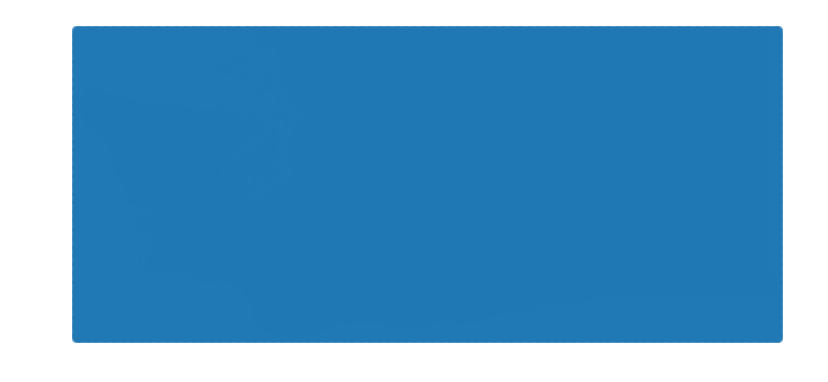

In [21]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
import matplotlib as mpl
import json
from requests.exceptions import HTTPError
from urllib.error import URLError


%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

nan = 'np.nan'
bing_api_key = ''
crs = {'init': 'epsg:4326'}

shp = 'Shapes/States/cb_2017_us_state_500k.shp'
us = gpd.read_file(shp)
wa = us[us['STUSPS']=="WA"]
by = .01    #trying a slightly larger grid to keep from crashing everything.


pts_grid = (
    pd.concat([pd.DataFrame({'pts_lon' : np.arange(wa.bounds['minx'], wa.bounds['maxx'], by)})
               , (pd.DataFrame({'pts_lat' : np.arange(wa.bounds['miny'], wa.bounds['maxy'], by)})
                  .pivot(columns = 'pts_lat', values = 'pts_lat'))]
        , axis = 1
             )
    .replace(method='ffill')
    .replace(method='bfill')
    .melt(id_vars=['pts_lon'])
    .drop('variable', 1)
    .rename(columns = {'value' : 'pts_lat'})
    .reset_index()
    .rename(columns={"index": "point_id"})
)
geometry_pts = [Point(xy) for xy in zip(pts_grid.pts_lon, pts_grid.pts_lat)]
gdf_pts_grid = GeoDataFrame(pts_grid, crs=crs, geometry=geometry_pts)

wa_plot = wa.plot(color='#C4C9CE', edgecolor='white')

(
    gdf_pts_grid
        .plot(ax=wa_plot, alpha = .3)
        .set_axis_off()
)



#save to shapefile so I can clip them in QGIS
#gdf_pts_grid.to_file("WA_01grid.shp")
#gdf_pts_grid

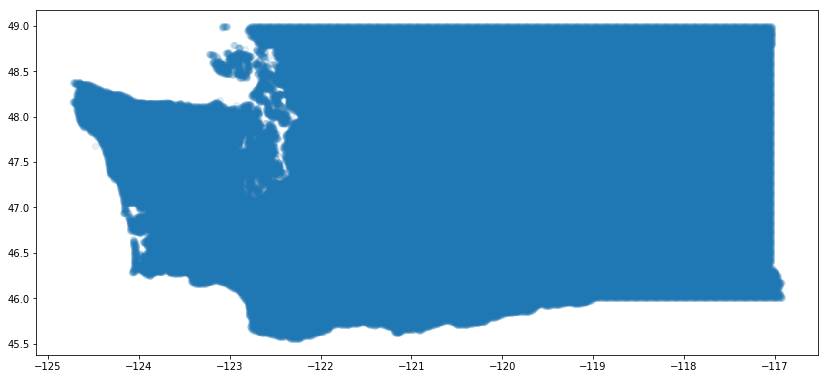

In [22]:
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

pts = 'WA_01pts.shp'
wa_pt_grid = gpd.read_file(pts)

wa_pt_grid.plot(alpha = .1)



Lets try this on something smaller. In the code block below, I take one of the smaller point geometry set, clipped by district, and attempt to run the Bing geocoding API in order to build my distance matrix.


In [58]:
from itertools import combinations
from random import randint
import simplejson
import urllib
from datetime import datetime
from decimal import Decimal

file = 'Shapes/09/CD09_05pts.shp'
CDgrid = gpd.read_file(file)

#zip lat/long to single column (easier than dealing with shapely geometry)
CDgrid['lat,long'] = list(zip(CDgrid.pts_lat, CDgrid.pts_lon))

#create a list of all coordinates so we can write this to NxN matrix
xytups = CDgrid['lat,long'].tolist()

#find all unique combinations of list entries, removes duplicate geocoding (assuming travel time from A to B = B to A.)
unicombos = [comb for comb in combinations(xytups, 2)]  

#lets see what we are up against, computationally - for CD09_05pts, we have 27 points, 351 unique combinations, and 729 possible combinations to work with.
#pointcount = len(xytups)
#totalcombinations = len(xytups)*len(xytups)
#print(pointcount)
#print(len(unicombos)) 
#print(totalcombinations)
   
#create the similarity matrix of n by n points
dmatrix = pd.DataFrame(index = xytups, columns = xytups)

#now, figure out the indexing to allow us to populate the matrix
# str(unicombos[0][0][0])) gives us the first combination of tuples, the first tuple in that combination, and the first coordinate in the first tuple in the first tuple combo: 47.49354099999989
length = len(unicombos)
nan = 'np.nan'

for i in range(length):
    #slice up the coordinate pairs in each unique tuple
    origtup = unicombos[i][0]
    desttup = unicombos[i][1]
    
    #slice up the x and y coordinates for each of the pairs in the unique tuple
    origx = unicombos[i][0][0]
    origy = unicombos[i][0][1]    
    destx = unicombos[i][1][0]
    desty = unicombos[i][1][1]
     
    #cast coordinates to string for the REST API    
    strox = str(origx)
    stroy = str(origy)
    strdx = str(origx)
    strdy = str(origy)
    
    #calculate travel time
    ttime = randint(1000,9999)

    
    #populate the matrix
    dmatrix.loc[origtup, desttup]= ttime
    dmatrix.loc[desttup, origtup]= ttime
    dmatrix.loc[origtup, origtup]= Decimal('nan')

dmatrix

,"(47.49354099999989, -122.16306800000015)","(47.2435409999999, -122.41306800000014)","(47.2935409999999, -122.31306800000014)","(47.44354099999989, -122.21306800000015)","(47.44354099999989, -122.31306800000014)","(47.543540999999884, -122.11306800000015)","(47.64354099999988, -122.16306800000015)","(47.64354099999988, -122.11306800000015)","(47.543540999999884, -122.31306800000014)","(47.543540999999884, -122.26306800000015)",...,"(47.59354099999988, -122.16306800000015)","(47.39354099999989, -122.31306800000014)","(47.59354099999988, -122.11306800000015)","(47.39354099999989, -122.26306800000015)","(47.39354099999989, -122.21306800000015)","(47.39354099999989, -122.16306800000015)","(47.2935409999999, -122.41306800000014)","(47.2935409999999, -122.36306800000014)","(47.49354099999989, -122.26306800000015)","(47.49354099999989, -122.21306800000015)"
"(47.49354099999989, -122.16306800000015)",NaN,4818,9552,1728,1240,1426,8025,6752,4371,1087,...,6045,1587,2326,9891,5615,9186,2873,4602,7783,6951
"(47.2435409999999, -122.41306800000014)",4818,NaN,7532,4499,1754,7327,1634,4982,6076,5667,...,6154,9325,6389,9831,7514,8862,1272,2444,9160,2428
"(47.2935409999999, -122.31306800000014)",9552,7532,NaN,2652,2060,9660,9827,2363,7621,7606,...,3670,3075,4244,3442,6076,4234,5169,9991,7246,9534
"(47.44354099999989, -122.21306800000015)",1728,4499,2652,NaN,1941,6861,9111,2391,3438,3251,...,5667,8541,2050,8367,7875,3289,5802,3314,1517,3854
"(47.44354099999989, -122.31306800000014)",1240,1754,2060,1941,NaN,3890,5388,8678,7909,3867,...,3199,8165,9813,4925,4000,5540,4759,4576,5298,4171
"(47.543540999999884, -122.11306800000015)",1426,7327,9660,6861,3890,NaN,7723,5780,2399,1281,...,6980,9062,2229,1649,3708,3759,7709,9883,6242,3379
"(47.64354099999988, -122.16306800000015)",8025,1634,9827,9111,5388,7723,NaN,3689,2309,3150,...,5534,7886,5613,2974,8764,4834,1083,5787,1638,3510
"(47.64354099999988, -122.11306800000015)",6752,4982,2363,2391,8678,5780,3689,NaN,5948,3063,...,7559,4678,5014,2688,9854,3057,3459,8414,2010,1227
"(47.543540999999884, -122.31306800000014)",4371,6076,7621,3438,7909,2399,2309,5948,NaN,8665,...,3074,8160,9257,5847,8312,1795,8440,5807,3477,2889
"(47.543540999999884, -122.26306800000015)",1087,5667,7606,3251,3867,1281,3150,3063,8665,NaN,...,3962,8845,1792,1102,5401,7559,5951,2353,2254,8995
